In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import re
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, accuracy_score
from IPython.display import FileLink
from sklearn.model_selection import train_test_split
import lightgbm as lgb


In [45]:
## Definind na_checker() which checks for percentage of NA values in each column

def na_checker(data):   
    '''Check all columns in a dataframe and returns a list of columns to discard'''
    #Initialize vectors
    col_to_discard = []
    col_to_fill = []
    # Set conditions
    for i in data.columns:
        p = round(1-(float(data[i].count())/float(len(data[i]))),3) 
        if p > 0.75:
            col_to_discard.append((p,i))
        elif p <= 0.75 and p > 0:
            col_to_fill.append((p,i))
    # Print report
    print("Discard following columns: ", col_to_discard)
    print("Consider filling those columns: ", col_to_fill)
    
    # Return
    col = list(map(lambda x: x[1],col_to_discard))
    return col

In [46]:
# Number of categories in Categorical Variable

def no_of_category(data):
    no_of_category = []
    for i in data.columns:
        if(data.dtypes[i]=='O'):
            no_of_category.append((i,len(data[i].unique())))
            
    print(pd.DataFrame(no_of_category))   

In [47]:
def encoder(data):
    '''Map the categorical variables to numbers to work with scikit learn'''
    for col in data.columns:
        if data.dtypes[col] == "O":
            le = preprocessing.LabelEncoder()
            data[col]=le.fit_transform(data[col])
            #data[col] = le.transform(data[col])
    return data


In [48]:
def frequency_response_rate(data):
    df1=pd.DataFrame(100*(data.value_counts()/len(train))).sort_index()
    df1.columns=['Frequency']
    df2=pd.DataFrame(100*(data[train_Y==0].value_counts()/(data.value_counts())))
    df2.columns=['Response_Rate']
    df=pd.concat([df1, df2], axis=1, join='inner')
    print(df)

In [49]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [50]:
train_Y=train['target']
train_X = train.drop(['transaction_id', 'cat_var_20', 'cat_var_21', 'cat_var_22', 'cat_var_26', 'cat_var_31',
                      'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_38', 'cat_var_40', 'cat_var_42',
                      'cat_var_23', 'cat_var_32', 'cat_var_33', 'cat_var_34', 'cat_var_39', 'cat_var_41',
                      'cat_var_7', 'cat_var_1', 'cat_var_3', 'cat_var_8', 'target'], axis=1)

sub_ids=test['transaction_id']
test_X = test.drop(['transaction_id', 'cat_var_20', 'cat_var_21', 'cat_var_22', 'cat_var_26', 'cat_var_31',
                      'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_38', 'cat_var_40', 'cat_var_42',
                      'cat_var_23', 'cat_var_32', 'cat_var_33', 'cat_var_34', 'cat_var_39', 'cat_var_41',
                      'cat_var_7', 'cat_var_1', 'cat_var_3', 'cat_var_8'], axis=1)

In [36]:
col = ['cat_var_4', 'cat_var_5', 'cat_var_9', 'cat_var_11', 'cat_var_12', 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18']
for i in col:
    train_X[i] = train_X[i].map({
                        'ep':0,
                        'tn':1,
                        'iq':2,
                        'hr':3,
                        'ce':4
                    })
    test_X[i] = test_X[i].map({
                        'ep':0,
                        'tn':1,
                        'iq':2,
                        'hr':3,
                        'ce':4
                    })   
    
     

In [37]:
l = train_X['cat_var_2'].tolist()
for i in range(len(l)):
    if l[i] == 'tn':
        l[i]=0
    elif l[i] == 'ce':
        l[i]=1
    else:
        l[i]=2

train_X['cat_var_2']=pd.DataFrame(l)      

l = test_X['cat_var_2'].tolist()
for i in range(len(l)):
    if l[i] == 'tn':
        l[i]=0
    elif l[i] == 'ce':
        l[i]=1
    else:
        l[i]=2

test_X['cat_var_2']=pd.DataFrame(l)  

In [38]:
l = train_X['cat_var_14'].tolist()
for i in range(len(l)):
    if l[i] == 'db':
        l[i]=0
    elif (l[i] == 'ep') or (l[i] == 'es') or (l[i] == 'ex') or (l[i] == 'ji') or (l[i] == 'rv') or (l[i] == 'tn'):
        l[i]=1
    else:
        l[i]=2

train_X['cat_var_14']=pd.DataFrame(l)

l = test_X['cat_var_14'].tolist()
for i in range(len(l)):
    if l[i] == 'db':
        l[i]=0
    elif (l[i] == 'ep') or (l[i] == 'es') or (l[i] == 'ex') or (l[i] == 'ji') or (l[i] == 'rv') or (l[i] == 'tn'):
        l[i]=1
    else:
        l[i]=2

test_X['cat_var_14']=pd.DataFrame(l)

In [39]:
l = train_X['cat_var_6'].tolist()
for i in range(len(l)):
    if l[i] == 'zs':
        l[i]=0
    elif l[i] == 'hm':
        l[i]=1
    else:
        l[i]=2

train_X['cat_var_6']=pd.DataFrame(l) 

l = test_X['cat_var_6'].tolist()
for i in range(len(l)):
    if l[i] == 'zs':
        l[i]=0
    elif l[i] == 'hm':
        l[i]=1
    else:
        l[i]=2

test_X['cat_var_6']=pd.DataFrame(l) 

In [40]:
le = preprocessing.LabelEncoder()
train_X['cat_var_13']=le.fit_transform(train_X['cat_var_13'])

le = preprocessing.LabelEncoder()
train_X['cat_var_10']=le.fit_transform(train_X['cat_var_10'])

le = preprocessing.LabelEncoder()
test_X['cat_var_13']=le.fit_transform(test_X['cat_var_13'])

le = preprocessing.LabelEncoder()
test_X['cat_var_10']=le.fit_transform(test_X['cat_var_10'])

Training until validation scores don't improve for 20 rounds.
[10]	training's auc: 0.755504	valid_1's auc: 0.729152
[20]	training's auc: 0.77878	valid_1's auc: 0.730215
[30]	training's auc: 0.796282	valid_1's auc: 0.733592
[40]	training's auc: 0.81205	valid_1's auc: 0.73164
[50]	training's auc: 0.82575	valid_1's auc: 0.731703
Early stopping, best iteration is:
[30]	training's auc: 0.796282	valid_1's auc: 0.733592


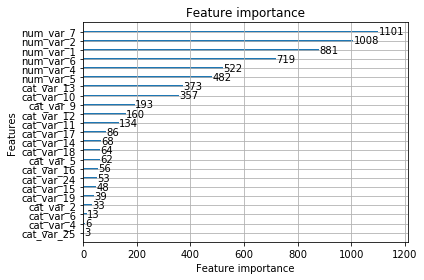

Training until validation scores don't improve for 20 rounds.
[10]	training's auc: 0.757803	valid_1's auc: 0.725785
[20]	training's auc: 0.776351	valid_1's auc: 0.729273
[30]	training's auc: 0.799411	valid_1's auc: 0.72975
[40]	training's auc: 0.818745	valid_1's auc: 0.728746
Early stopping, best iteration is:
[22]	training's auc: 0.783188	valid_1's auc: 0.730733


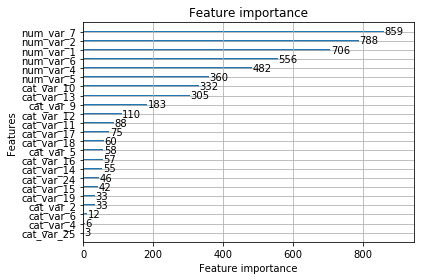

Training until validation scores don't improve for 20 rounds.
[10]	training's auc: 0.758116	valid_1's auc: 0.719844
[20]	training's auc: 0.778249	valid_1's auc: 0.71945
[30]	training's auc: 0.799433	valid_1's auc: 0.715599
Early stopping, best iteration is:
[12]	training's auc: 0.761032	valid_1's auc: 0.720413


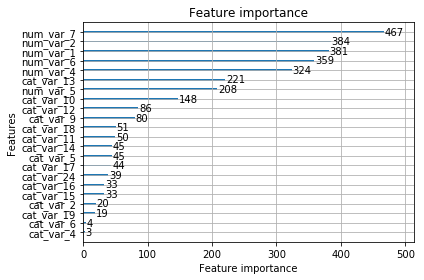

Training until validation scores don't improve for 20 rounds.
[10]	training's auc: 0.756941	valid_1's auc: 0.726366
[20]	training's auc: 0.782092	valid_1's auc: 0.728385
[30]	training's auc: 0.799202	valid_1's auc: 0.729782
[40]	training's auc: 0.805673	valid_1's auc: 0.731669
[50]	training's auc: 0.817987	valid_1's auc: 0.731885
[60]	training's auc: 0.833598	valid_1's auc: 0.731242
Early stopping, best iteration is:
[49]	training's auc: 0.816794	valid_1's auc: 0.732013


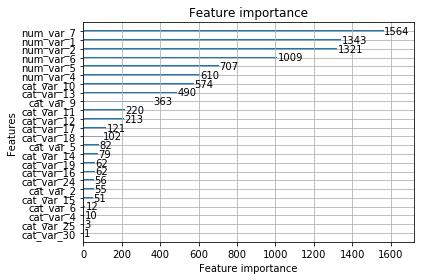

In [42]:

params = {
    'learning_rate': 0.25,
    'application': 'binary',
    'max_depth': 10,
    'num_leaves': 256,
    'verbosity': -1,
    'metric': 'auc'
}
moedels = []
for i in range(4):
    trainX, validX, trainy, validy = train_test_split(train_X, train_Y, test_size = 0.1, random_state = i) 
    d_train = lgb.Dataset(trainX, label=trainy, max_bin=8192)
    d_valid = lgb.Dataset(validX, label=validy, max_bin=8192)
    watchlist = [d_train, d_valid]

    model = lgb.train(params, train_set=d_train, num_boost_round=240, valid_sets=watchlist, \
    early_stopping_rounds=20, verbose_eval=10) 
    moedels.append(model)
    ax = lgb.plot_importance(model)
    plt.tight_layout()
    plt.show()
    plt.savefig('feature_importance_{}.png'.format(i))

preds = None
for i, model in enumerate(moedels):
    pred = model.predict(test_X)
    if(i == 0):
        preds = pred
    else:
        preds += pred
preds /= len(moedels)

In [ ]:
sub = pd.DataFrame({'transaction_id': sub_ids, 'target': preds})
filename = 'sub4.csv'
sub.to_csv(filename, index=False)
FileLink(filename)

In [43]:
#AUC
sub = pd.DataFrame({'transaction_id': sub_ids, 'target': preds})
filename = 'sub8.csv'
sub.to_csv(filename, index=False)
FileLink(filename)

/home/dj/Desktop/Competition/Untitled Folder/f992303a-d-BW2017_2/sub8.csv

In [56]:
#frequency_response_rate(train_X.cat_var_13)

    Frequency  Response_Rate
ap   0.303171      91.398866
aq   0.073930      91.472868
ba   0.061035      84.976526
ce   1.576317      93.273950
cg   0.392002      34.941520
cs   0.053585      94.117647
da   0.920115      84.677671
db   0.291136      92.421260
en   1.458831      90.394814
ep   0.314920      88.626024
es   6.151391      90.920948
ex   0.320077      91.405551
fm   0.231533      89.603960
gh   1.157380      93.587522
hm  29.899879      91.449436
hn   0.467365      91.416309
hr  38.045378      91.766212
hz   0.052152      90.659341
io   0.234112      91.554468
ip   2.574088      93.866192
iq   1.084309      92.283298
ji   1.062818      81.720140
kj   0.220071      92.578125
ln   0.131813      90.217391
mf   0.059316      91.787440
mm   0.753916      94.032687
mp   0.050146      90.285714
mx   0.429540      78.185457
na   0.071638      83.600000
no   0.576827      92.250373
og   0.267639      89.400428
op   0.276808      88.923395
pb   0.454756      91.682420
pt   0.752770 

In [51]:
#hm mm td ua ye
#cg db es ex ip ji mp qt rv xy yv
l = train_X['cat_var_10'].tolist()
for i in range(len(l)):
    if l[i] == 'mm' or l[i] == 'hm' or l[i] == 'td' or l[i] == 'ua' or l[i] == 'ye':
        l[i]='cat_var_10_1'
    elif (l[i] == 'cg') or (l[i] == 'db') or (l[i] == 'ex') or (l[i] == 'ji') or (l[i] == 'rv') or (l[i] == 'es') or (l[i] == 'ip') or (l[i] == 'mp') or (l[i] == 'qt') or (l[i] == 'xy') or (l[i] == 'yv'):
        l[i]='cat_var_10_2'
    else:
        l[i]='cat_var_10_3'

train_X['cat_var_10']=pd.DataFrame(l)

l = test_X['cat_var_10'].tolist()
for i in range(len(l)):
    if l[i] == 'mm' or l[i] == 'hm' or l[i] == 'td' or l[i] == 'ua' or l[i] == 'ye':
        l[i]='cat_var_10_1'
    elif (l[i] == 'cg') or (l[i] == 'db') or (l[i] == 'ex') or (l[i] == 'ji') or (l[i] == 'rv') or (l[i] == 'es') or (l[i] == 'ip') or (l[i] == 'mp') or (l[i] == 'qt') or (l[i] == 'xy') or (l[i] == 'yv'):
        l[i]='cat_var_10_2'
    else:
        l[i]='cat_var_10_3'


test_X['cat_var_10']=pd.DataFrame(l)

In [52]:
l = train_X['cat_var_13'].tolist()
for i in range(len(l)):
    if l[i] == 'hm':
        l[i]='cat_var_13_hm'
    elif l[i] == 'hr':
        l[i]='cat_var_13_hr'
    else:
        l[i]='cat_var_13_oth'

train_X['cat_var_13']=pd.DataFrame(l)      

l = test_X['cat_var_13'].tolist()
for i in range(len(l)):
    if l[i] == 'hm':
        l[i]='cat_var_13_hm'
    elif l[i] == 'hr':
        l[i]='cat_var_13_hr'
    else:
        l[i]='cat_var_13_oth'

test_X['cat_var_13']=pd.DataFrame(l) 

In [53]:
l = train_X['cat_var_2'].tolist()
for i in range(len(l)):
    if l[i] == 'tn':
        l[i]='cat_var_2_tn'
    elif l[i] == 'ce':
        l[i]='cat_var_2_ce'
    else:
        l[i]='cat_var_2_oth'

train_X['cat_var_2']=pd.DataFrame(l)      

l = test_X['cat_var_2'].tolist()
for i in range(len(l)):
    if l[i] == 'tn':
        l[i]='cat_var_2_tn'
    elif l[i] == 'ce':
        l[i]='cat_var_2_ce'
    else:
        l[i]='cat_var_2_oth'

test_X['cat_var_2']=pd.DataFrame(l)  

In [54]:
l = train_X['cat_var_6'].tolist()
for i in range(len(l)):
    if l[i] == 'zs':
        l[i]='cat_var_6_zs'
    elif l[i] == 'hm':
        l[i]='cat_var_6_hm'
    else:
        l[i]='cat_var_6_oth'

train_X['cat_var_6']=pd.DataFrame(l) 

l = test_X['cat_var_6'].tolist()
for i in range(len(l)):
    if l[i] == 'zs':
        l[i]='cat_var_6_zs'
    elif l[i] == 'hm':
        l[i]='cat_var_6_hm'
    else:
        l[i]='cat_var_6_oth'

test_X['cat_var_6']=pd.DataFrame(l) 

In [55]:
l = train_X['cat_var_14'].tolist()
for i in range(len(l)):
    if l[i] == 'db':
        l[i]='cat_var_14_1'
    elif (l[i] == 'ep') or (l[i] == 'es') or (l[i] == 'ex') or (l[i] == 'ji') or (l[i] == 'rv') or (l[i] == 'tn'):
        l[i]='cat_var_14_2'
    else:
        l[i]='cat_var_14_3'

train_X['cat_var_14']=pd.DataFrame(l)

l = test_X['cat_var_14'].tolist()
for i in range(len(l)):
    if l[i] == 'db':
        l[i]='cat_var_14_1'
    elif (l[i] == 'ep') or (l[i] == 'es') or (l[i] == 'ex') or (l[i] == 'ji') or (l[i] == 'rv') or (l[i] == 'tn'):
        l[i]='cat_var_14_2'
    else:
        l[i]='cat_var_14_3'

test_X['cat_var_14']=pd.DataFrame(l)

In [56]:
col = ['cat_var_4', 'cat_var_5', 'cat_var_9', 'cat_var_11', 'cat_var_12', 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18']
for i in col:
    train_X[i] = train_X[i].map({
                        'ep':i+'_ep',
                        'tn':i+'_tn',
                        'iq':i+'_iq',
                        'hr':i+'_hr',
                        'ce':i+'_ce'
                    })
    test_X[i] = test_X[i].map({
                        'ep':i+'_ep',
                        'tn':i+'_tn',
                        'iq':i+'_iq',
                        'hr':i+'_hr',
                        'ce':i+'_ce'
                    })   
    
     

In [57]:
no_of_category(train_X)

             0  1
0    cat_var_2  3
1    cat_var_4  2
2    cat_var_5  2
3    cat_var_6  3
4    cat_var_9  5
5   cat_var_10  3
6   cat_var_11  5
7   cat_var_12  5
8   cat_var_13  3
9   cat_var_14  3
10  cat_var_15  2
11  cat_var_16  2
12  cat_var_17  2
13  cat_var_18  2


In [58]:
cat_features=['cat_var_4', 'cat_var_5', 'cat_var_9', 'cat_var_11', 'cat_var_12', 'cat_var_15', 'cat_var_16', 'cat_var_17',
              'cat_var_18', 'cat_var_10', 'cat_var_13', 'cat_var_2', 'cat_var_6', 'cat_var_14']

In [59]:
for i in cat_features:
    dummies=pd.get_dummies(train_X[i], drop_first=True)
    train_X[dummies.columns]=dummies

In [60]:
train_X.columns

Index(['num_var_1', 'num_var_2', 'num_var_3', 'num_var_4', 'num_var_5',
       'num_var_6', 'num_var_7', 'cat_var_2', 'cat_var_4', 'cat_var_5',
       'cat_var_6', 'cat_var_9', 'cat_var_10', 'cat_var_11', 'cat_var_12',
       'cat_var_13', 'cat_var_14', 'cat_var_15', 'cat_var_16', 'cat_var_17',
       'cat_var_18', 'cat_var_19', 'cat_var_24', 'cat_var_25', 'cat_var_27',
       'cat_var_28', 'cat_var_29', 'cat_var_30', 'cat_var_4_tn',
       'cat_var_5_tn', 'cat_var_9_ep', 'cat_var_9_hr', 'cat_var_9_iq',
       'cat_var_9_tn', 'cat_var_11_ep', 'cat_var_11_hr', 'cat_var_11_iq',
       'cat_var_11_tn', 'cat_var_12_ep', 'cat_var_12_hr', 'cat_var_12_iq',
       'cat_var_12_tn', 'cat_var_15_tn', 'cat_var_16_tn', 'cat_var_17_tn',
       'cat_var_18_tn', 'cat_var_10_2', 'cat_var_10_3', 'cat_var_13_hr',
       'cat_var_13_oth', 'cat_var_2_oth', 'cat_var_2_tn', 'cat_var_6_oth',
       'cat_var_6_zs', 'cat_var_14_2', 'cat_var_14_3'],
      dtype='object')

In [64]:
train_X.drop(cat_features, 1, inplace=True)
test_X.drop(cat_features, 1, inplace=True)

In [62]:
train_X.dtypes

num_var_1         float64
num_var_2         float64
num_var_3         float64
num_var_4         float64
num_var_5         float64
num_var_6         float64
num_var_7         float64
cat_var_2          object
cat_var_4          object
cat_var_5          object
cat_var_6          object
cat_var_9          object
cat_var_10         object
cat_var_11         object
cat_var_12         object
cat_var_13         object
cat_var_14         object
cat_var_15         object
cat_var_16         object
cat_var_17         object
cat_var_18         object
cat_var_19          int64
cat_var_24          int64
cat_var_25          int64
cat_var_27          int64
cat_var_28          int64
cat_var_29          int64
cat_var_30          int64
cat_var_4_tn        uint8
cat_var_5_tn        uint8
cat_var_9_ep        uint8
cat_var_9_hr        uint8
cat_var_9_iq        uint8
cat_var_9_tn        uint8
cat_var_11_ep       uint8
cat_var_11_hr       uint8
cat_var_11_iq       uint8
cat_var_11_tn       uint8
cat_var_12_e

Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.747934	valid_1's auc: 0.731307
[20]	training's auc: 0.77526	valid_1's auc: 0.73083
[30]	training's auc: 0.783081	valid_1's auc: 0.73297
[40]	training's auc: 0.807887	valid_1's auc: 0.732285
[50]	training's auc: 0.825623	valid_1's auc: 0.734201
[60]	training's auc: 0.836421	valid_1's auc: 0.735326
[70]	training's auc: 0.849828	valid_1's auc: 0.733459
[80]	training's auc: 0.855371	valid_1's auc: 0.732602
[90]	training's auc: 0.86412	valid_1's auc: 0.732361
[100]	training's auc: 0.868963	valid_1's auc: 0.732404
[110]	training's auc: 0.876854	valid_1's auc: 0.732016
Early stopping, best iteration is:
[61]	training's auc: 0.839764	valid_1's auc: 0.735381


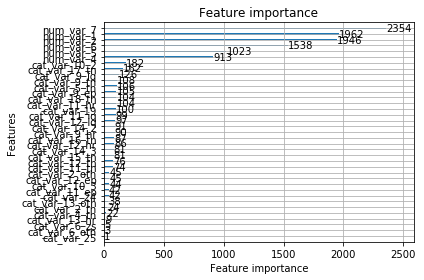

Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.75024	valid_1's auc: 0.730024
[20]	training's auc: 0.768105	valid_1's auc: 0.730662
[30]	training's auc: 0.794139	valid_1's auc: 0.728852
[40]	training's auc: 0.801126	valid_1's auc: 0.7292
[50]	training's auc: 0.822027	valid_1's auc: 0.730113
[60]	training's auc: 0.831455	valid_1's auc: 0.731246
[70]	training's auc: 0.840512	valid_1's auc: 0.731104
[80]	training's auc: 0.849087	valid_1's auc: 0.73108
[90]	training's auc: 0.853567	valid_1's auc: 0.728594
[100]	training's auc: 0.859479	valid_1's auc: 0.727395
[110]	training's auc: 0.864078	valid_1's auc: 0.725911
Early stopping, best iteration is:
[63]	training's auc: 0.835839	valid_1's auc: 0.732079


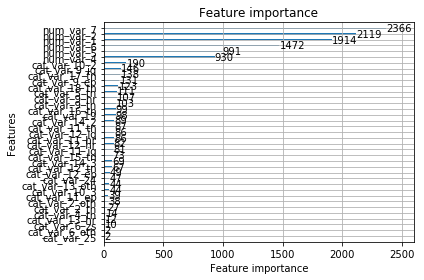

Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.750364	valid_1's auc: 0.719628
[20]	training's auc: 0.772093	valid_1's auc: 0.719639
[30]	training's auc: 0.786692	valid_1's auc: 0.717358
[40]	training's auc: 0.79551	valid_1's auc: 0.717734
[50]	training's auc: 0.806538	valid_1's auc: 0.715807
Early stopping, best iteration is:
[9]	training's auc: 0.748624	valid_1's auc: 0.720591


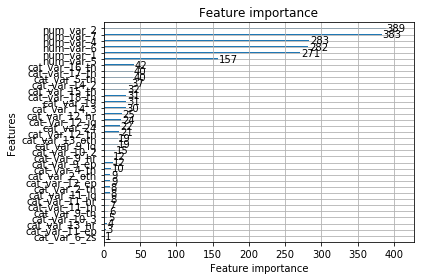

Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.751874	valid_1's auc: 0.723889
[20]	training's auc: 0.777029	valid_1's auc: 0.728216
[30]	training's auc: 0.791379	valid_1's auc: 0.727677
[40]	training's auc: 0.802608	valid_1's auc: 0.726655
[50]	training's auc: 0.807136	valid_1's auc: 0.726021
[60]	training's auc: 0.819593	valid_1's auc: 0.726132
[70]	training's auc: 0.833072	valid_1's auc: 0.726108
Early stopping, best iteration is:
[20]	training's auc: 0.777029	valid_1's auc: 0.728216


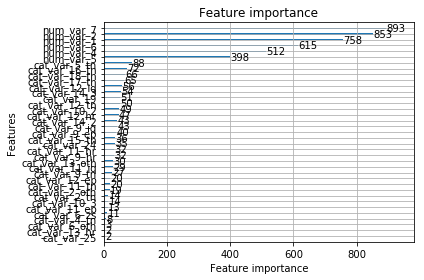

In [79]:

params = {
    'learning_rate': 0.25,
    'application': 'binary',
    'max_depth': 10,
    'num_leaves': 256,
    'verbosity': -1,
    'metric': 'auc',
    'scale_pos_weight': 0.4
    
}
moedels = []
for i in range(4):
    trainX, validX, trainy, validy = train_test_split(train_X, train_Y, test_size = 0.1, random_state = i) 
    d_train = lgb.Dataset(trainX, label=trainy, max_bin=8192)
    d_valid = lgb.Dataset(validX, label=validy, max_bin=8192)
    watchlist = [d_train, d_valid]

    model = lgb.train(params, train_set=d_train, num_boost_round=240, valid_sets=watchlist, \
    early_stopping_rounds=50, verbose_eval=10) 
    moedels.append(model)
    ax = lgb.plot_importance(model)
    plt.tight_layout()
    plt.show()
    plt.savefig('feature_importance_{}.png'.format(i))

preds = None
for i, model in enumerate(moedels):
    pred = model.predict(test_X)
    if(i == 0):
        preds = pred
    else:
        preds += pred
preds /= len(moedels)

In [39]:
sub = pd.DataFrame({'transaction_id': sub_ids, 'target': preds})
filename = 'sub5.csv'
sub.to_csv(filename, index=False)
FileLink(filename)

/home/dj/Desktop/Competition/Untitled Folder/f992303a-d-BW2017_2/sub5.csv

In [66]:
sub = pd.DataFrame({'transaction_id': sub_ids, 'target': preds})
filename = 'sub9.csv'
sub.to_csv(filename, index=False)
FileLink(filename)

/home/dj/Desktop/Competition/Untitled Folder/f992303a-d-BW2017_2/sub9.csv

In [80]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_Y=train['target']
train_X = train.drop(['transaction_id', 'cat_var_20', 'cat_var_21', 'cat_var_22', 'cat_var_26', 'cat_var_31',
                      'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_38', 'cat_var_40', 'cat_var_42',
                      'cat_var_23', 'cat_var_32', 'cat_var_33', 'cat_var_34', 'cat_var_39', 'cat_var_41',
                      'cat_var_7', 'target'], axis=1)

sub_ids=test['transaction_id']
test_X = test.drop(['transaction_id', 'cat_var_20', 'cat_var_21', 'cat_var_22', 'cat_var_26', 'cat_var_31',
                      'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_38', 'cat_var_40', 'cat_var_42',
                      'cat_var_23', 'cat_var_32', 'cat_var_33', 'cat_var_34', 'cat_var_39', 'cat_var_41',
                      'cat_var_7'], axis=1)

In [81]:
#encoder = preprocessing.LabelEncoder()
train_X["cat_var_1"] = (train_X["cat_var_1"].fillna('Nan'))
train_X["cat_var_3"] = (train_X["cat_var_3"].fillna('Nan'))
train_X["cat_var_8"] = (train_X["cat_var_8"].fillna('Nan'))
test_X["cat_var_1"] = (test_X["cat_var_1"].fillna('Nan'))
test_X["cat_var_3"] = (test_X["cat_var_3"].fillna('Nan'))
test_X["cat_var_8"] = (test_X["cat_var_8"].fillna('Nan'))
def encoder(data):
    '''Map the categorical variables to numbers to work with scikit learn'''
    for col in data.columns:
        if data.dtypes[col] == "O":
            le = preprocessing.LabelEncoder()
            data[col]=le.fit_transform(data[col])
            #data[col] = le.transform(data[col])
    return data


In [82]:
test_X.cat_var_6=test_X.cat_var_6.fillna('zs')


In [83]:
train_X=encoder(train_X)
test_X=encoder(test_X)

In [84]:
train_X.head()

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,...,cat_var_16,cat_var_17,cat_var_18,cat_var_19,cat_var_24,cat_var_25,cat_var_27,cat_var_28,cat_var_29,cat_var_30
0,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,0,3,74,...,1,1,0,0,1,0,0,0,0,0
1,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,66,48,603,...,1,1,1,1,1,0,0,0,0,0
2,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,128,3,156,...,1,1,0,1,1,0,0,0,0,0
3,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,0,3,138,...,1,1,0,1,1,0,0,0,0,0
4,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,66,48,605,...,1,1,1,1,1,0,0,0,0,0


Training until validation scores don't improve for 20 rounds.
[10]	training's auc: 0.74921	valid_1's auc: 0.728547
[20]	training's auc: 0.765629	valid_1's auc: 0.730654
[30]	training's auc: 0.776527	valid_1's auc: 0.731052
[40]	training's auc: 0.790589	valid_1's auc: 0.729031
[50]	training's auc: 0.8033	valid_1's auc: 0.728131
Early stopping, best iteration is:
[33]	training's auc: 0.779712	valid_1's auc: 0.731222


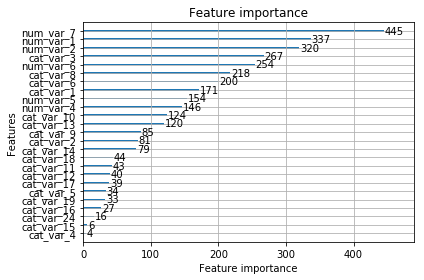

Training until validation scores don't improve for 20 rounds.
[10]	training's auc: 0.750386	valid_1's auc: 0.728307
[20]	training's auc: 0.765322	valid_1's auc: 0.72487
[30]	training's auc: 0.773177	valid_1's auc: 0.726399
Early stopping, best iteration is:
[11]	training's auc: 0.751883	valid_1's auc: 0.728708


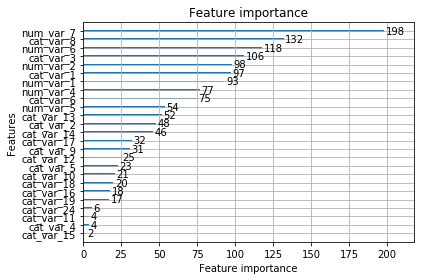

Training until validation scores don't improve for 20 rounds.
[10]	training's auc: 0.752173	valid_1's auc: 0.718078
[20]	training's auc: 0.766311	valid_1's auc: 0.720867
[30]	training's auc: 0.777876	valid_1's auc: 0.720138
Early stopping, best iteration is:
[17]	training's auc: 0.763845	valid_1's auc: 0.723054


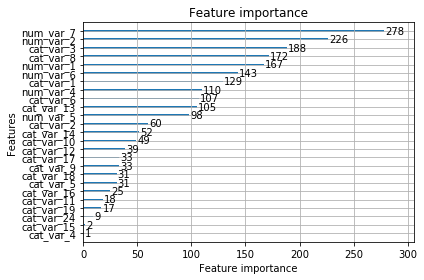

Training until validation scores don't improve for 20 rounds.
[10]	training's auc: 0.75225	valid_1's auc: 0.725178
[20]	training's auc: 0.768475	valid_1's auc: 0.729507
[30]	training's auc: 0.780382	valid_1's auc: 0.732068
[40]	training's auc: 0.797846	valid_1's auc: 0.726874
[50]	training's auc: 0.810526	valid_1's auc: 0.726989
Early stopping, best iteration is:
[30]	training's auc: 0.780382	valid_1's auc: 0.732068


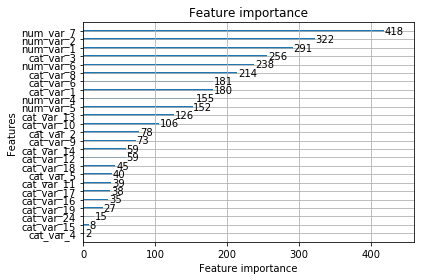

In [105]:

params = {
    'learning_rate': 0.25,
    'application': 'binary',
    'max_depth': 10,
    'min_data_in_leaf': 100,
    'num_leaves': 128,
    'feature_fraction': 0.8,
    'verbosity': -1,
    'metric': 'auc',
    'is_imbalance': True
}
moedels = []
for i in range(4):
    trainX, validX, trainy, validy = train_test_split(train_X, train_Y, test_size = 0.1, random_state = i) 
    d_train = lgb.Dataset(trainX, label=trainy, max_bin=8192)
    d_valid = lgb.Dataset(validX, label=validy, max_bin=8192)
    watchlist = [d_train, d_valid]

    model = lgb.train(params, train_set=d_train, num_boost_round=240, valid_sets=watchlist, \
    early_stopping_rounds=20, verbose_eval=10) 
    moedels.append(model)
    ax = lgb.plot_importance(model)
    plt.tight_layout()
    plt.show()
    plt.savefig('feature_importance_{}.png'.format(i))

preds = None
for i, model in enumerate(moedels):
    pred = model.predict(test_X)
    if(i == 0):
        preds = pred
    else:
        preds += pred
preds /= len(moedels)

In [25]:
sub = pd.DataFrame({'transaction_id': sub_ids, 'target': preds})
filename = 'sub6.csv'
sub.to_csv(filename, index=False)
FileLink(filename)

/home/dj/Desktop/Competition/Untitled Folder/f992303a-d-BW2017_2/sub6.csv

In [28]:
#AUC
sub = pd.DataFrame({'transaction_id': sub_ids, 'target': preds})
filename = 'sub7.csv'
sub.to_csv(filename, index=False)
FileLink(filename) #0.73400

/home/dj/Desktop/Competition/Untitled Folder/f992303a-d-BW2017_2/sub7.csv

In [88]:
# is_imbalance
#AUC
sub = pd.DataFrame({'transaction_id': sub_ids, 'target': preds})
filename = 'sub10.csv'
sub.to_csv(filename, index=False)
FileLink(filename)

/home/dj/Desktop/Competition/Untitled Folder/f992303a-d-BW2017_2/sub10.csv

In [96]:
# is_imbalance
#AUC
#max_depth=14
sub = pd.DataFrame({'transaction_id': sub_ids, 'target': preds})
filename = 'sub11.csv'
sub.to_csv(filename, index=False)
FileLink(filename)

/home/dj/Desktop/Competition/Untitled Folder/f992303a-d-BW2017_2/sub11.csv

In [101]:
#    'max_depth': 10,
#    'min_data_in_leaf': 100,
#   'num_leaves': 128,
#    is_imbalance
#    AUC

sub = pd.DataFrame({'target': preds, 'transaction_id': sub_ids})
filename = 'sub12.csv'
sub.to_csv(filename, index=False)
FileLink(filename) #0.73282

/home/dj/Desktop/Competition/Untitled Folder/f992303a-d-BW2017_2/sub12.csv

In [106]:
'''    'learning_rate': 0.25,
    'application': 'binary',
    'max_depth': 10,
    'min_data_in_leaf': 100,
    'num_leaves': 128,
    'feature_fraction': 0.8,
    'verbosity': -1,
    'metric': 'auc',
    'is_imbalance': True
'''

sub = pd.DataFrame({'target': preds, 'transaction_id': sub_ids})
filename = 'sub13.csv'
sub.to_csv(filename, index=False)
FileLink(filename) #0.73123

/home/dj/Desktop/Competition/Untitled Folder/f992303a-d-BW2017_2/sub13.csv